In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 16})

## Read the 4 csv files and assign to 4 different data frame and delete the unnecessary columns. Filter all the 4 data frames with strength = 0.4 and italic = 0 and assign them to 4 different class.

In [3]:
selected_file = ["GILL.csv", "LEELAWADEE.csv", "ROMAN.csv", "TECHNIC.csv"]
col_to_be_skipped = ["strength", "italic", "fontVariant", "m_label", "orientation", "m_top", "m_left", "originalH", 
                     "originalW", "h", "w"]
for i in range(4):
    temp_df = pd.read_csv(selected_file[i])
    temp_df = temp_df[(temp_df["strength"] == 0.4) & (temp_df["italic"] == 0)]
    globals()["CL" + str(i + 1)] = temp_df.drop(col_to_be_skipped, axis = 1)

## Print out the size of each class and the total size of 4 classes.

In [4]:
class_size = pd.DataFrame()
total_size = 0
for i in range(4):
    temp = len(eval("CL" + str(i + 1)))
    class_size.loc["CL" + str(i + 1), "Size"] = temp
    total_size += temp
    
class_size.loc["Total", "Size"] = total_size
class_size

,Size
CL1,1459.0
CL2,1378.0
CL3,1194.0
CL4,1380.0
Total,5411.0


## Combine all the 4 classes and assign to a data frame.

In [5]:
df = pd.concat([CL1, CL2, CL3, CL4])
df.reset_index(inplace = True, drop = True)
df

,font,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
1,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
2,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
3,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
4,GILL,1,1,1,1,1,1,1,1,182,...,255,182,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5407,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5408,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5409,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [6]:
fonts = list(pd.unique(df["font"]))
for i in range(4):
    df["font"].replace(fonts[i], i+1, inplace = True)
    
df.columns = ["TRUC"] + list(range(1,401))

## Centered and Scaled the features

In [7]:
from sklearn.preprocessing import StandardScaler
s_df = df.copy()
SS = StandardScaler().fit(s_df.iloc[:, 1:])
s_X = pd.DataFrame(SS.transform(s_df.iloc[:, 1:]))
s_X.columns = list(range(1,401))
s_df = pd.concat([s_df.iloc[:, 0], s_X], axis = 1)
s_df

,TRUC,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
1,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
2,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
3,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
4,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.948643,-1.057909,-1.100480,0.491606,...,0.931823,0.407013,-1.162936,-1.145409,-1.038984,-0.907903,-0.853926,-0.830463,-0.832267,-0.784684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5407,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5408,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5409,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120


## PCA by using built-in function

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
PCA_df = pd.DataFrame(pca.fit_transform(s_df.iloc[:, 1:]), columns = range(1,401))
smallest_r = sum(pca.explained_variance_ratio_.cumsum()*100 < 90) + 1
PCA_df_truncated = pd.concat([s_df.iloc[:, 0], PCA_df.iloc[:, :smallest_r]], axis = 1)
PCA_df_truncated

,TRUC,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,1,20.332784,1.244968,2.770551,2.108697,2.092227,1.404583,2.925979,6.147425,0.176731,...,-0.076148,1.172436,1.839684,0.380400,-0.243611,0.135824,-0.476836,-0.503615,-0.579575,-1.348265
1,1,17.831947,0.657077,4.138162,3.398261,-0.133968,-0.728075,2.771573,5.780410,0.457113,...,-0.397738,1.356670,1.865610,-0.056153,-0.973844,0.657121,-0.296229,0.047840,-0.159664,-1.496714
2,1,20.332784,1.244968,2.770551,2.108697,2.092227,1.404583,2.925979,6.147425,0.176731,...,-0.076148,1.172436,1.839684,0.380400,-0.243611,0.135824,-0.476836,-0.503615,-0.579575,-1.348265
3,1,17.831947,0.657077,4.138162,3.398261,-0.133968,-0.728075,2.771573,5.780410,0.457113,...,-0.397738,1.356670,1.865610,-0.056153,-0.973844,0.657121,-0.296229,0.047840,-0.159664,-1.496714
4,1,-5.703227,-3.046316,5.904054,-1.294242,4.690338,-0.800444,-2.485547,-0.529631,-0.094875,...,1.027921,0.542441,1.085625,-1.378583,-1.267574,-0.520335,1.402115,-1.286168,-0.096062,-0.509746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,4,1.651691,19.066567,-3.292475,2.381131,0.832540,2.213316,2.678367,-2.430246,-2.249833,...,-0.120819,-0.305131,-0.649797,-1.089859,-0.104004,-0.867265,0.337076,0.432950,-0.854959,-0.240174
5407,4,1.651691,19.066567,-3.292475,2.381131,0.832540,2.213316,2.678367,-2.430246,-2.249833,...,-0.120819,-0.305131,-0.649797,-1.089859,-0.104004,-0.867265,0.337076,0.432950,-0.854959,-0.240174
5408,4,1.651691,19.066567,-3.292475,2.381131,0.832540,2.213316,2.678367,-2.430246,-2.249833,...,-0.120819,-0.305131,-0.649797,-1.089859,-0.104004,-0.867265,0.337076,0.432950,-0.854959,-0.240174
5409,4,1.651691,19.066567,-3.292475,2.381131,0.832540,2.213316,2.678367,-2.430246,-2.249833,...,-0.120819,-0.305131,-0.649797,-1.089859,-0.104004,-0.867265,0.337076,0.432950,-0.854959,-0.240174


## Problem 1: Split the data set into training set and test set

In [9]:
s_training = pd.DataFrame()
s_test = pd.DataFrame()
size_test_training = pd.DataFrame(index = ["CL" + str(i + 1) for i in range(4)], columns = ["Test", "Training"])

from sklearn.model_selection import train_test_split
for i in range(4):
    temp = PCA_df_truncated[PCA_df_truncated["TRUC"] == i + 1]
    temp_train, temp_test = train_test_split(temp, train_size = 0.8, random_state = 19920221)
    s_training = pd.concat([s_training, temp_train])
    s_test = pd.concat([s_test, temp_test])
    size_test_training.loc["CL" + str(i + 1), "Test"] = len(temp_test)
    size_test_training.loc["CL" + str(i + 1), "Training"] = len(temp_train)
    
size_test_training

,Test,Training
CL1,292,1167
CL2,276,1102
CL3,239,955
CL4,276,1104


## Problem 2: 

### 2.1 Built the random forest with 100 trees.

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_100 = RandomForestClassifier(n_estimators = 100, random_state = 19920221)
rf_100.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
pred_training_100 = rf_100.predict(s_training.iloc[:, 1:])
pred_test_100 = rf_100.predict(s_test.iloc[:, 1:])

### 2.2 Calculate the global performance and confusion matrix

In [11]:
global_perf_table = pd.DataFrame(index = ["Training", "Test"], columns = ["Accuracy"])
global_perf_table.loc["Training", "Accuracy"] = round(np.mean(pred_training_100 == s_training.iloc[:, 0])*100, 2)
global_perf_table.loc["Test", "Accuracy"] = round(np.mean(pred_test_100 == s_test.iloc[:, 0])*100, 2)
global_perf_table

,Accuracy
Training,98.27
Test,86.33


In [12]:
from sklearn import metrics
conf_matrix_test_100 = round(pd.DataFrame(metrics.confusion_matrix(s_test.iloc[:, 0], pred_test_100, 
                                                                   normalize = "true", labels = [1, 2, 3, 4]), 
                                          index = ["CL1", "CL2", "CL3", "CL4"], 
                                          columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_test_100.index.name = "True"
conf_matrix_test_100.columns.name = "Predicted"
conf_matrix_test_100

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,88.36,8.90,0.34,2.40
CL2,10.14,80.43,3.26,6.16
CL3,3.77,9.21,83.26,3.77
CL4,7.25,0.00,0.00,92.75


In [13]:
conf_matrix_training_100 = round(pd.DataFrame(metrics.confusion_matrix(s_training.iloc[:, 0], pred_training_100, 
                                                                       normalize = "true", labels = [1, 2, 3, 4]), 
                                              index = ["CL1", "CL2", "CL3", "CL4"], 
                                              columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_training_100.index.name = "True"
conf_matrix_training_100.columns.name = "Predicted"
conf_matrix_training_100

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,99.83,0.17,0.0,0.00
CL2,2.90,97.10,0.0,0.00
CL3,2.20,0.00,97.8,0.00
CL4,1.81,0.00,0.0,98.19


## Problem 3:
### 3.1 Built the random forest with 200 and 300 trees.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_200 = RandomForestClassifier(n_estimators = 200, random_state = 19920221)
rf_200.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
pred_training_200 = rf_200.predict(s_training.iloc[:, 1:])
pred_test_200 = rf_200.predict(s_test.iloc[:, 1:])

In [15]:
conf_matrix_test_200 = round(pd.DataFrame(metrics.confusion_matrix(s_test.iloc[:, 0], pred_test_200, 
                                                                   normalize = "true", labels = [1, 2, 3, 4]), 
                                          index = ["CL1", "CL2", "CL3", "CL4"], 
                                          columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_test_200.index.name = "True"
conf_matrix_test_200.columns.name = "Predicted"
conf_matrix_test_200

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,88.01,8.56,0.00,3.42
CL2,9.78,79.71,3.99,6.52
CL3,3.77,7.53,84.94,3.77
CL4,7.25,0.00,0.00,92.75


In [16]:
conf_matrix_training_200 = round(pd.DataFrame(metrics.confusion_matrix(s_training.iloc[:, 0], pred_training_200, 
                                                                       normalize = "true", labels = [1, 2, 3, 4]), 
                                              index = ["CL1", "CL2", "CL3", "CL4"], 
                                              columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_training_200.index.name = "True"
conf_matrix_training_200.columns.name = "Predicted"
conf_matrix_training_200

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,99.83,0.17,0.0,0.00
CL2,2.90,97.10,0.0,0.00
CL3,2.20,0.00,97.8,0.00
CL4,1.81,0.00,0.0,98.19


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_300 = RandomForestClassifier(n_estimators = 300, random_state = 19920221)
rf_300.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
pred_training_300 = rf_300.predict(s_training.iloc[:, 1:])
pred_test_300 = rf_300.predict(s_test.iloc[:, 1:])

In [18]:
conf_matrix_test_300 = round(pd.DataFrame(metrics.confusion_matrix(s_test.iloc[:, 0], pred_test_300, 
                                                                   normalize = "true", labels = [1, 2, 3, 4]), 
                                          index = ["CL1", "CL2", "CL3", "CL4"], 
                                          columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_test_300.index.name = "True"
conf_matrix_test_300.columns.name = "Predicted"
conf_matrix_test_300

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,89.38,7.88,0.00,2.74
CL2,9.06,80.43,4.71,5.80
CL3,3.77,6.69,85.36,4.18
CL4,7.25,0.00,0.00,92.75


In [19]:
conf_matrix_training_300 = round(pd.DataFrame(metrics.confusion_matrix(s_training.iloc[:, 0], pred_training_300, 
                                                                       normalize = "true", labels = [1, 2, 3, 4]), 
                                              index = ["CL1", "CL2", "CL3", "CL4"], 
                                              columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_training_300.index.name = "True"
conf_matrix_training_300.columns.name = "Predicted"
conf_matrix_training_300

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,99.91,0.09,0.0,0.00
CL2,2.99,97.01,0.0,0.00
CL3,2.20,0.00,97.8,0.00
CL4,1.81,0.00,0.0,98.19


### 3.2 Compare the performance and select the best tree number.

In [20]:
global_accuracy_diff_tree = pd.DataFrame(columns = ["Number of Tree", "Test Accuracy", "Upper Limit", "Lower Limit"],
                                        index = range(3))
for i in range(3):
    temp_accuracy = np.mean(eval("pred_test_" + str((i+1)*100)) == s_test.iloc[:, 0])
    temp_me = np.sqrt(temp_accuracy * (1 - temp_accuracy) / len(s_test))
    global_accuracy_diff_tree.iloc[i, 0] = (i+1)*100
    global_accuracy_diff_tree.iloc[i, 1] = round(temp_accuracy*100, 2)
    global_accuracy_diff_tree.iloc[i, 2] = round((temp_accuracy + 1.6*temp_me)*100, 2)
    global_accuracy_diff_tree.iloc[i, 3] = round((temp_accuracy - 1.6*temp_me)*100, 2)
    
global_accuracy_diff_tree

,Number of Tree,Test Accuracy,Upper Limit,Lower Limit
0,100,86.33,88,84.66
1,200,86.43,88.09,84.76
2,300,87.07,88.7,85.44


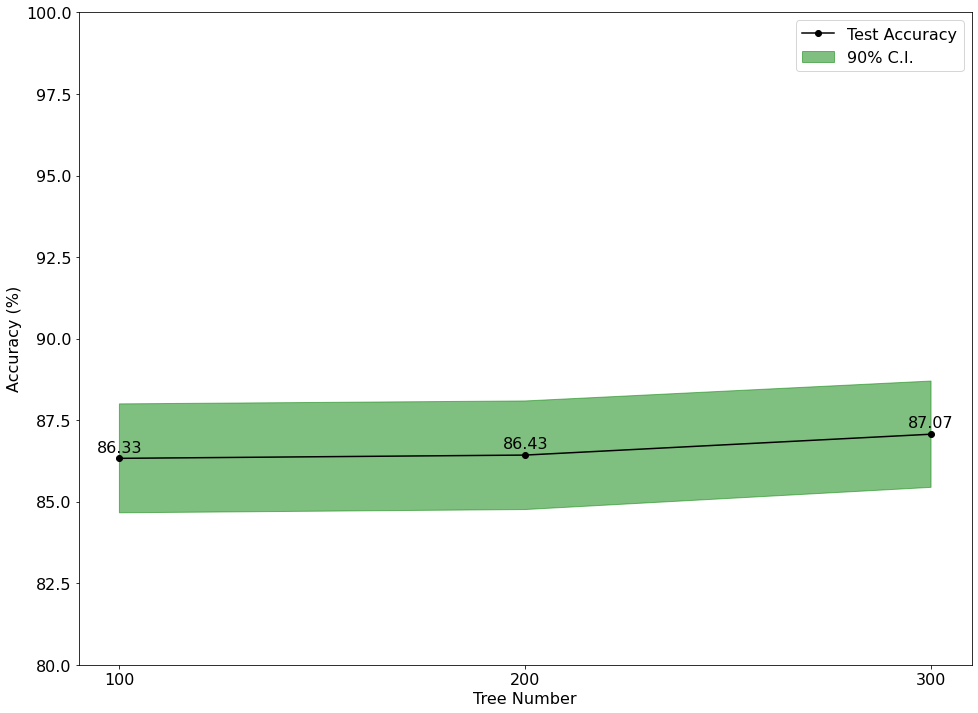

In [21]:
fig, ax = plt.subplots(1, 1)
ax.plot(global_accuracy_diff_tree["Number of Tree"], global_accuracy_diff_tree["Test Accuracy"], marker = "o", 
        color = "black", label = "Test Accuracy")

from matplotlib.patches import Polygon
temp_list_1 = list(zip(global_accuracy_diff_tree["Number of Tree"], global_accuracy_diff_tree["Upper Limit"]))
temp_list_2 = list(zip(global_accuracy_diff_tree["Number of Tree"], global_accuracy_diff_tree["Lower Limit"]))
ax.add_patch(Polygon(temp_list_1 + temp_list_2[::-1], alpha = 0.5, color = "green", label = "90% C.I."))

for i in range(3):
    ax.text(global_accuracy_diff_tree.loc[i, "Number of Tree"], global_accuracy_diff_tree.loc[i, "Test Accuracy"]+0.2, 
            global_accuracy_diff_tree.loc[i, "Test Accuracy"], ha = "center")

ax.set_ylim([80, 100])
ax.set_xticks([100, 200, 300])
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Tree Number")
ax.legend()
plt.show()

## Problem 4:
### 4.1 Feature Importance

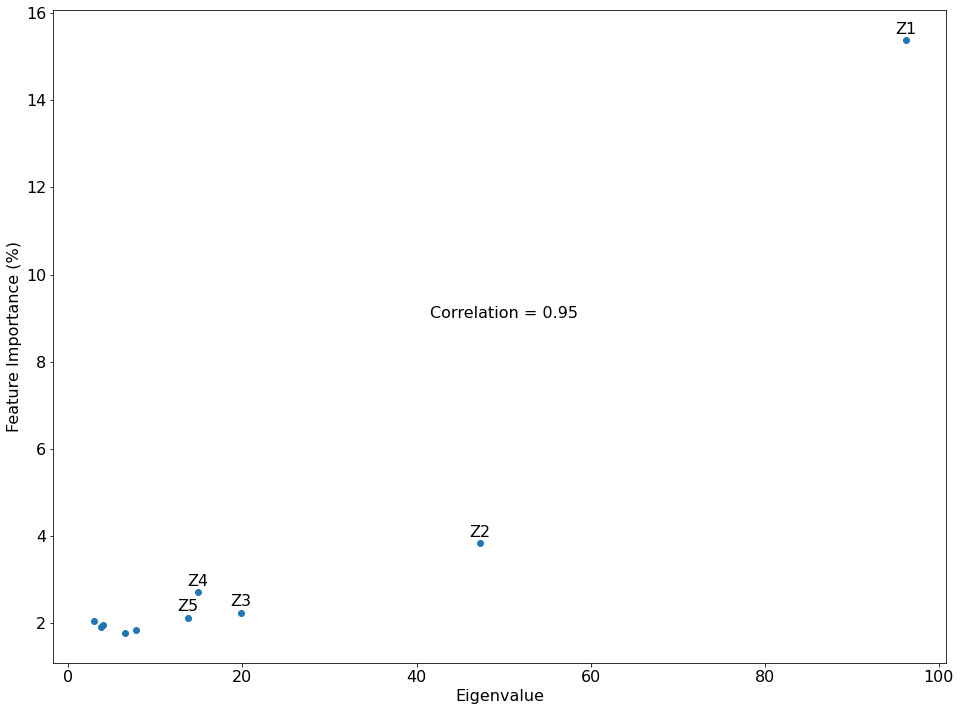

In [22]:
feature_IM = np.round(rf_300.feature_importances_*100, 2)
top10_IM_idx = feature_IM.argsort()[::-1][:10]
eig_value = pca.explained_variance_[:62]

cor_L_IM = round(np.corrcoef(eig_value[top10_IM_idx], feature_IM[top10_IM_idx])[0][1], 2)

fig, ax = plt.subplots(1, 1)
ax.scatter(eig_value[top10_IM_idx], feature_IM[top10_IM_idx])

for i in range(5):
    ax.text(eig_value[top10_IM_idx][i], 
            feature_IM[top10_IM_idx][i] + 0.15, 
            "Z" + str(top10_IM_idx[i] + 1), ha = "center")
    
ax.text(50, 9, "Correlation = " + str(cor_L_IM), ha = "center")

ax.set_xlabel("Eigenvalue")
ax.set_ylabel("Feature Importance (%)")
plt.show()

In [23]:
print("Top 10 Important Feature (Principal Component):", list(top10_IM_idx + 1))

Top 10 Important Feature (Principal Component): [1, 2, 4, 3, 5, 25, 18, 20, 9, 13]


## Problem 5: Performance Comparison and Automatic Classifier Improvement

### 5.1: Worst Classification among two classes

In [24]:
pair_misclassified = pd.DataFrame(index = range(6), columns = ["1st Class", "2nd Class", "Misclassified Rate"])
from itertools import combinations
pair_list = list(combinations([i+1 for i in range(4)], 2))
for i in range(6):
    pair_misclassified.iloc[i, 0] = pair_list[i][0]
    pair_misclassified.iloc[i, 1] = pair_list[i][1]
    pair_misclassified.iloc[i, 2] = conf_matrix_test_300.iloc[pair_list[i][0]-1, pair_list[i][1]-1] + conf_matrix_test_300.iloc[pair_list[i][1]-1, pair_list[i][0]-1]

pair_misclassified

,1st Class,2nd Class,Misclassified Rate
0,1,2,16.94
1,1,3,3.77
2,1,4,9.99
3,2,3,11.4
4,2,4,5.8
5,3,4,4.18


### 5.2: Test Accuracy between two classes

In [25]:
for i in range(6):
    temp_pair_training = s_training[(s_training["TRUC"] == pair_list[i][0]) | (s_training["TRUC"] == pair_list[i][1])]
    temp_pair_test = s_test[(s_test["TRUC"] == pair_list[i][0]) | (s_test["TRUC"] == pair_list[i][1])]
    rf_pair = RandomForestClassifier(n_estimators = 300)
    rf_pair.fit(temp_pair_training.iloc[:, 1:], temp_pair_training.iloc[:, 0])
    pred_test = rf_pair.predict(temp_pair_test.iloc[:, 1:])
    globals()["conf_matrix_" 
              + str(pair_list[i][0]) 
              + str(pair_list[i][1])] = round(pd.DataFrame(metrics.confusion_matrix(temp_pair_test.iloc[:, 0], 
                                                                                    pred_test, normalize = "true", 
                                                                                    labels = [pair_list[i][0], 
                                                                                              pair_list[i][1]]), 
                                                           index = ["CL" + str(pair_list[i][0]), "CL" + str(pair_list[i][1])], 
                                                           columns = ["CL" + str(pair_list[i][0]), "CL" + str(pair_list[i][1])])*100, 2)
    eval("conf_matrix_" + str(pair_list[i][0]) + str(pair_list[i][1])).index.name = "True"
    eval("conf_matrix_" + str(pair_list[i][0]) + str(pair_list[i][1])).columns.name = "Predicted"

In [26]:
conf_matrix_12

Predicted,CL1,CL2
True,,
CL1,89.38,10.62
CL2,9.78,90.22


In [27]:
conf_matrix_13

Predicted,CL1,CL3
True,,
CL1,99.66,0.34
CL3,7.11,92.89


In [28]:
conf_matrix_14

Predicted,CL1,CL4
True,,
CL1,96.23,3.77
CL4,7.25,92.75


In [29]:
conf_matrix_23

Predicted,CL2,CL3
True,,
CL2,95.29,4.71
CL3,15.48,84.52


In [30]:
conf_matrix_24

Predicted,CL2,CL4
True,,
CL2,94.2,5.8
CL4,5.8,94.2


In [31]:
conf_matrix_34

Predicted,CL3,CL4
True,,
CL3,93.72,6.28
CL4,2.17,97.83


### 5.3 Improvement

#### 1. Increase the number of trees

In [32]:
trees = list(range(10, 501, 10))
accuracy_diff_tree = pd.DataFrame(index = range(len(trees)), columns = ["Tree Number", "Accuracy"])
for i in range(len(trees)):
    rf_diff_tree = RandomForestClassifier(n_estimators = trees[i], random_state = 19920221, n_jobs = 7)
    rf_diff_tree.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
    pred_test = rf_diff_tree.predict(s_test.iloc[:, 1:])
    accuracy_diff_tree.iloc[i, 0] = trees[i]
    accuracy_diff_tree.iloc[i, 1] = round(np.mean(pred_test == s_test.iloc[:, 0])*100, 2)
    
accuracy_diff_tree                

,Tree Number,Accuracy
0,10,83.47
1,20,86.24
2,30,86.43
3,40,86.06
4,50,86.89
5,60,86.06
6,70,86.24
7,80,86.43
8,90,86.33
9,100,86.33


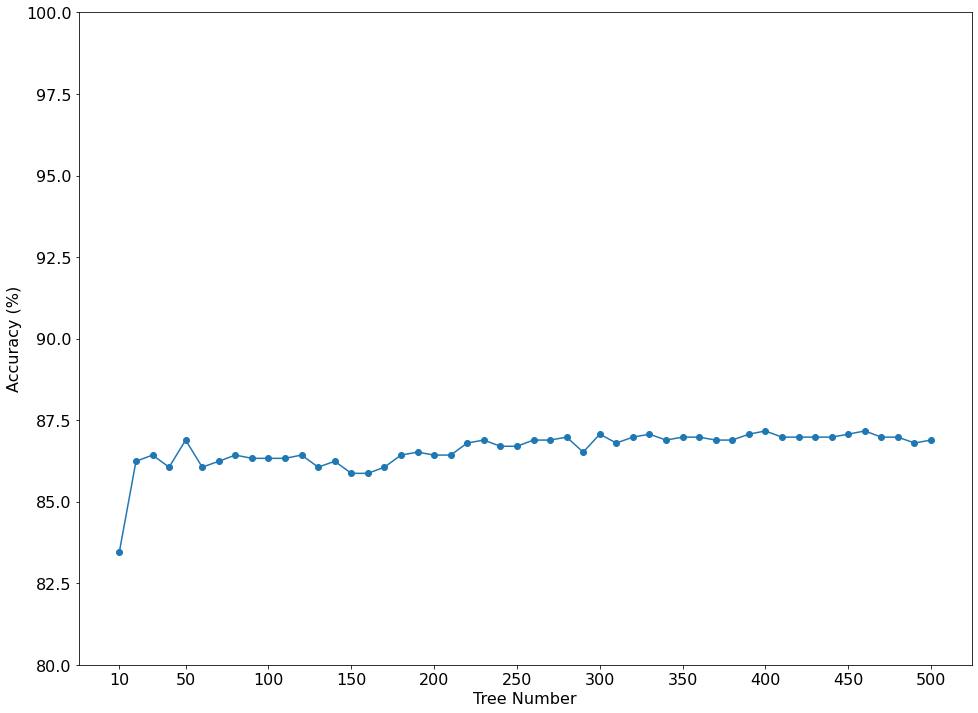

In [33]:
fig, ax = plt.subplots(1, 1)
ax.plot(accuracy_diff_tree["Tree Number"], accuracy_diff_tree["Accuracy"], marker = "o")

ax.set_xlabel("Tree Number")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim([80, 100])
ax.set_xticks([10] + list(range(50, 501, 50)))
plt.show()

#### 2. Change the number of features to be used in each tree in random forest

In [34]:
n_feature = range(1, smallest_r+1)
accuracy_diff_n_feature = pd.DataFrame(index = n_feature, columns = ["Number of Features", "Accuracy"])
for i in range(len(n_feature)):
    rf_diff_n_feature = RandomForestClassifier(n_estimators = 300, max_features = n_feature[i], 
                                               random_state = 19920221, n_jobs = 7)
    rf_diff_n_feature.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
    pred_test = rf_diff_n_feature.predict(s_test.iloc[:, 1:])
    accuracy_diff_n_feature.iloc[i, 0] = n_feature[i]
    accuracy_diff_n_feature.iloc[i, 1] = round(np.mean(pred_test == s_test.iloc[:, 0])*100, 2)
    
accuracy_diff_n_feature

,Number of Features,Accuracy
1,1,87.81
2,2,87.81
3,3,87.26
4,4,87.63
5,5,86.89
...,...,...
58,58,85.6
59,59,85.23
60,60,84.49
61,61,84.86


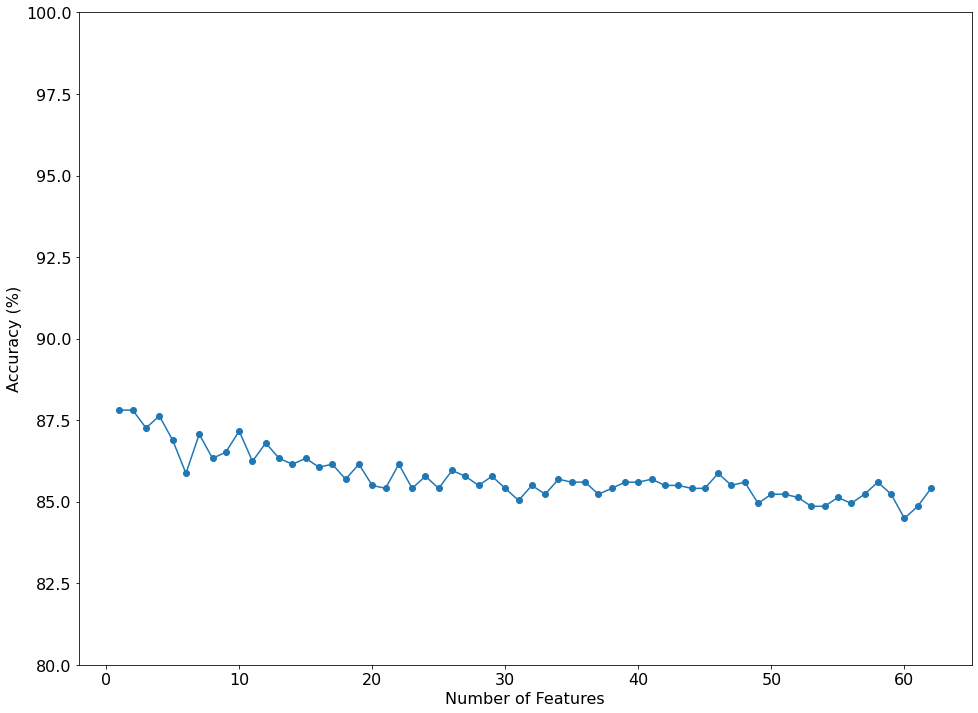

In [35]:
fig, ax = plt.subplots(1, 1)
ax.plot(accuracy_diff_n_feature["Number of Features"], accuracy_diff_n_feature["Accuracy"], marker = "o")

ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim([80, 100])
plt.show()

#### 3. Preliminary clustering by k-means before RF Classification

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, n_init = 20, random_state = 19920221).fit(s_training.iloc[:, 1:])
centers = pd.DataFrame(km.cluster_centers_)
clustered_y = pd.DataFrame(km.predict(s_training.iloc[:, 1:]), index = s_training.index, columns = ["Cluster"])

In [37]:
def cluster_dist(df):
    import math
    cluster_distance = []
    for i in range(4):
        cluster_distance.append(math.dist(centers.iloc[i, :], df))
    return cluster_distance.index(min(cluster_distance))
        
clustered_test = pd.concat([pd.DataFrame(s_test.iloc[:, 1:].apply(cluster_dist, axis = 1), columns = ["Cluster"]), 
                            s_test], axis = 1)

In [38]:
clustered_training = pd.concat([clustered_y, s_training], axis = 1)
clustered_TRUC = pd.DataFrame()
clustered_PRED = pd.DataFrame()
for i in range(4):
    temp_clustered_train = clustered_training[clustered_training["Cluster"] == i]
    temp_clustered_test = clustered_test[clustered_test["Cluster"] == i]
    globals()["rf_cluster_" + str(i)] = RandomForestClassifier(n_estimators = 300, random_state = 19920221, n_jobs = 7)
    eval("rf_cluster_" + str(i)).fit(temp_clustered_train.iloc[:, 2:], temp_clustered_train.iloc[:, 1])
    temp_pred = pd.DataFrame(eval("rf_cluster_" + str(i)).predict(temp_clustered_test.iloc[:, 2:]), index = temp_clustered_test.index)
    clustered_TRUC = pd.concat([clustered_TRUC, temp_clustered_test.iloc[:,1]])
    clustered_PRED = pd.concat([clustered_PRED, temp_pred])
    
print("Overall Accuracy:", round(np.mean(clustered_PRED == clustered_TRUC)*100, 2)[0])

Overall Accuracy: 85.78


In [39]:
conf_matrix_kmeans = pd.DataFrame(np.round(metrics.confusion_matrix(clustered_TRUC, clustered_PRED, normalize = "true", 
                                                                    labels = [1, 2, 3, 4])*100, 2),
                                  index = ["CL1", "CL2", "CL3", "CL4"], columns = ["CL1", "CL2", "CL3", "CL4"])
conf_matrix_kmeans.index.name = "True"
conf_matrix_kmeans.columns.name = "Predicted"
conf_matrix_kmeans

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,84.93,9.59,1.37,4.11
CL2,7.97,80.43,5.07,6.52
CL3,3.77,7.11,84.10,5.02
CL4,4.35,1.45,0.72,93.48
